# E-commerce Customer Behavior Dataset

[Link to Dataset](https://www.kaggle.com/datasets/uom190346a/e-commerce-customer-behavior-dataset)

## Columns

| Column Name              | Type                      | Description                                                                                           |
|--------------------------|---------------------------|-------------------------------------------------------------------------------------------------------|
| Customer ID              | Numeric                   | A unique identifier assigned to each customer, ensuring distinction across the dataset.                |
| Gender                   | Categorical (Male, Female)| Specifies the gender of the customer, allowing for gender-based analytics.                              |
| Age                      | Numeric                   | Represents the age of the customer, enabling age-group-specific insights.                                |
| City                     | Categorical (City names)  | Indicates the city of residence for each customer, providing geographic insights.                        |
| Membership Type          | Categorical (Gold, Silver, Bronze) | Identifies the type of membership held by the customer, influencing perks and benefits.          |
| Total Spend              | Numeric                   | Records the total monetary expenditure by the customer on the e-commerce platform.                      |
| Items Purchased          | Numeric                   | Quantifies the total number of items purchased by the customer.                                          |
| Average Rating           | Numeric (0 to 5, with decimals) | Represents the average rating given by the customer for purchased items, gauging satisfaction.     |
| Discount Applied         | Boolean (True, False)     | Indicates whether a discount was applied to the customer's purchase, influencing buying behavior.     |
| Days Since Last Purchase | Numeric                   | Reflects the number of days elapsed since the customer's most recent purchase, aiding in retention analysis. |
| Satisfaction Level       | Categorical (Satisfied, Neutral, Unsatisfied) | Captures the overall satisfaction level of the customer, providing a subjective measure of their experience. |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Analiza i predobrada dataset-a

In [3]:
df = pd.read_csv("E-commerce Customer Behavior - Sheet1.csv")

In [4]:
df.shape

(350, 11)

In [5]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'City', 'Membership Type',
       'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied',
       'Days Since Last Purchase', 'Satisfaction Level'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [7]:
df.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [8]:
df

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...,...
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


In [9]:
df.drop(['Customer ID'], axis=1, inplace=True)

In [10]:
df[df.isna().any(axis=1)]

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
71,Female,37,Houston,Bronze,420.8,7,3.1,False,21,NaN
143,Female,37,Houston,Bronze,430.8,7,3.4,False,23,NaN


### Impute missing values

In [11]:
df['Satisfaction Level'] = SimpleImputer(strategy='most_frequent').fit_transform(df[['Satisfaction Level']]).squeeze()

In [12]:
df.iloc[[71,143]]

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
71,Female,37,Houston,Bronze,420.8,7,3.1,False,21,Satisfied
143,Female,37,Houston,Bronze,430.8,7,3.4,False,23,Satisfied


### Eksploracija dataset-a

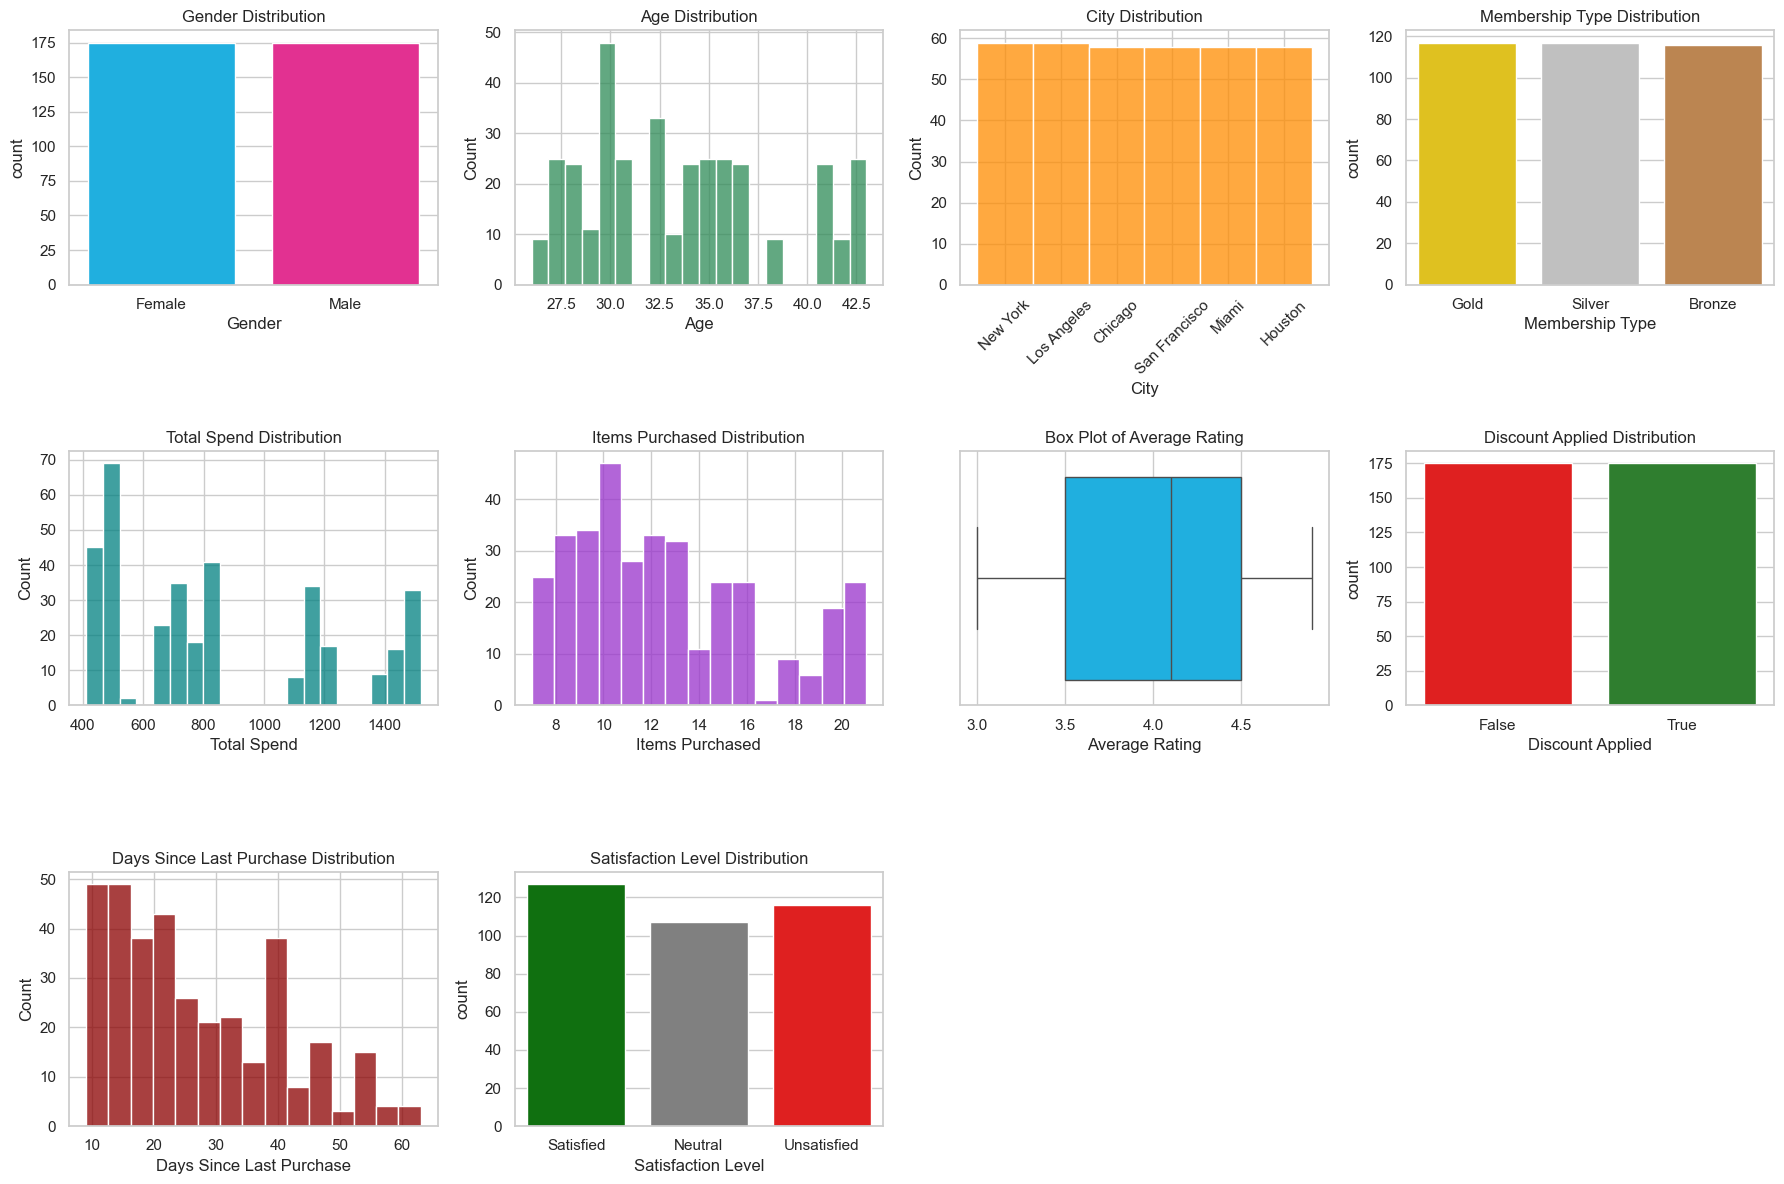

In [13]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))
fig.delaxes(axes[2, 2])
fig.delaxes(axes[2, 3])

sns.countplot(x='Gender', data=df, palette={'Male': 'deeppink', 'Female': 'deepskyblue'}, ax=axes[0, 0], legend=False, hue='Gender')
axes[0, 0].set_title('Gender Distribution')

sns.histplot(df['Age'], bins=20, color='seagreen', ax=axes[0, 1])
axes[0, 1].set_title('Age Distribution')

sns.histplot(df['City'], bins=20, color='darkorange', ax=axes[0, 2])
axes[0, 2].set_title('City Distribution')
axes[0, 2].tick_params(axis='x', rotation=45)

sns.countplot(x='Membership Type', data=df, palette=('gold', 'silver', 'peru'), ax=axes[0, 3], legend=False, hue='Membership Type')
axes[0, 3].set_title('Membership Type Distribution')

sns.histplot(df['Total Spend'], bins=20, color='teal', ax=axes[1, 0])
axes[1, 0].set_title('Total Spend Distribution')

sns.histplot(df['Items Purchased'], bins=15, color='darkorchid', ax=axes[1, 1])
axes[1, 1].set_title('Items Purchased Distribution')

sns.boxplot(x='Average Rating', data=df, color='deepskyblue', ax=axes[1, 2])
axes[1, 2].set_title('Box Plot of Average Rating')

sns.countplot(x='Discount Applied', data=df, palette=('red', 'forestgreen'), ax=axes[1, 3], legend=False, hue='Discount Applied')
axes[1, 3].set_title('Discount Applied Distribution')

sns.histplot(df['Days Since Last Purchase'], bins=15, color='darkred', ax=axes[2, 0])
axes[2, 0].set_title('Days Since Last Purchase Distribution')

sns.countplot(x='Satisfaction Level', data=df, palette=('green', 'gray', 'red'), ax=axes[2, 1], hue='Satisfaction Level', legend=False)
axes[2, 1].set_title('Satisfaction Level Distribution')

plt.tight_layout(h_pad=2.0)
plt.show()

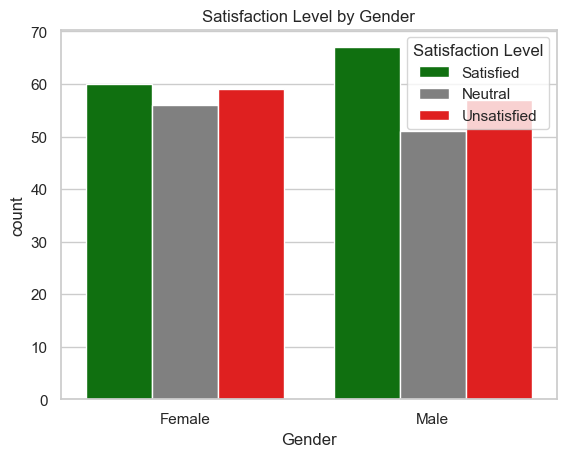

In [14]:
sns.countplot(x='Gender', palette=('green', 'gray', 'red'), hue='Satisfaction Level', data=df)
plt.title('Satisfaction Level by Gender')
plt.show()

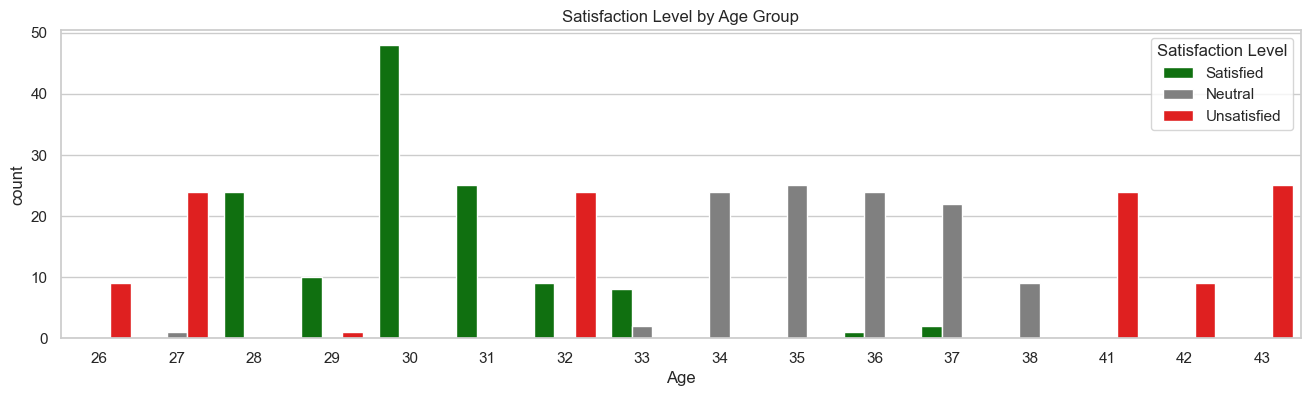

In [15]:
plt.figure(figsize=(16, 4))
sns.countplot(x='Age', palette=('green', 'gray', 'red'), hue='Satisfaction Level', data=df,  hue_order=['Satisfied', 'Neutral', 'Unsatisfied'])
plt.title('Satisfaction Level by Age Group')
plt.show()

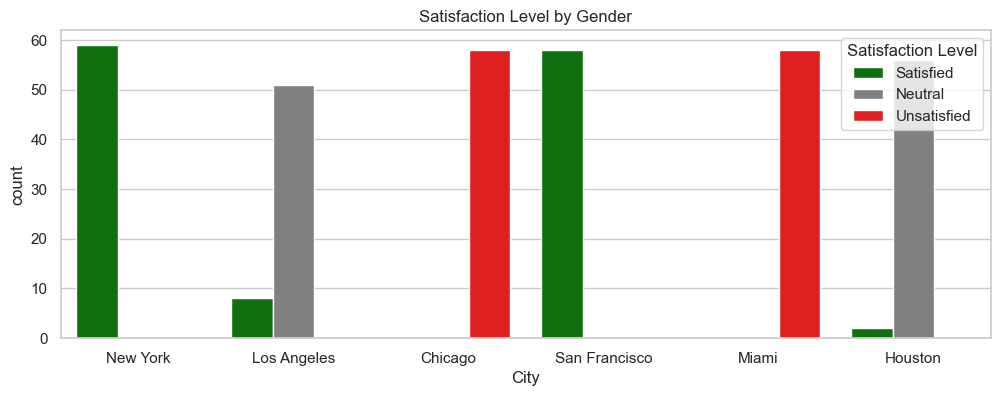

In [16]:
plt.figure(figsize=(12, 4))
sns.countplot(x='City', palette=('green', 'gray', 'red'), hue='Satisfaction Level', data=df)
plt.title('Satisfaction Level by Gender')
plt.show()

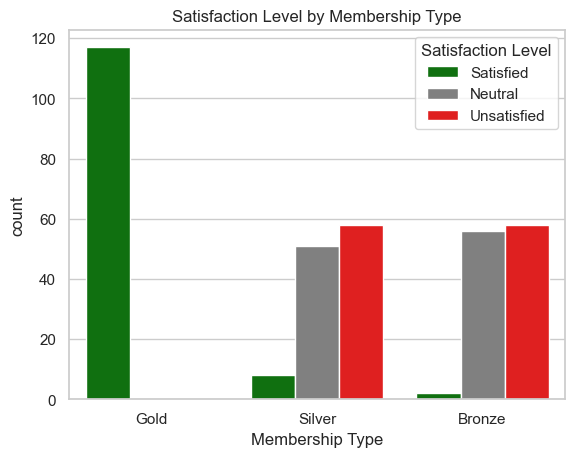

In [17]:
sns.countplot(x='Membership Type', palette=('green', 'gray', 'red'), hue='Satisfaction Level', data=df)
plt.title('Satisfaction Level by Membership Type')
plt.show()

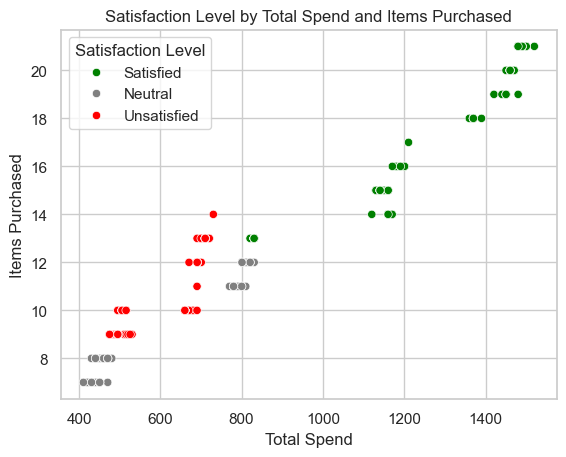

In [18]:
sns.scatterplot(x='Total Spend', y='Items Purchased', palette=('green', 'gray', 'red'), hue='Satisfaction Level', data=df)
plt.title('Satisfaction Level by Total Spend and Items Purchased')
plt.show()

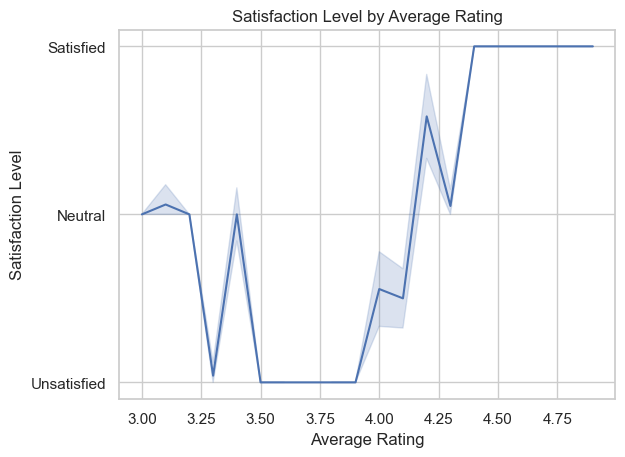

In [19]:
sns.lineplot(x='Average Rating', y='Satisfaction Level', data=df)
plt.title('Satisfaction Level by Average Rating')
plt.show()

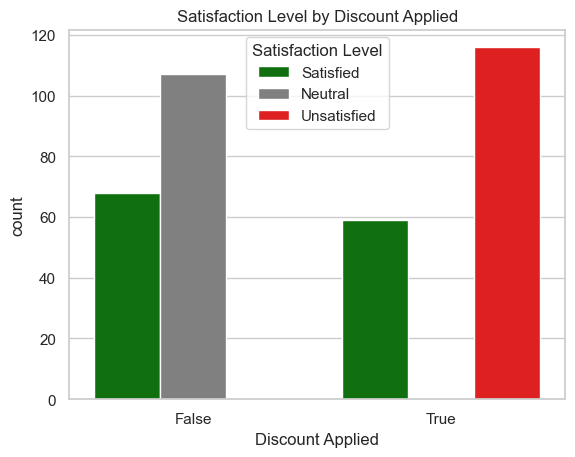

In [20]:
sns.countplot(x='Discount Applied', palette=('green', 'gray', 'red'), hue='Satisfaction Level', data=df, hue_order=['Satisfied', 'Neutral', 'Unsatisfied'])
plt.title('Satisfaction Level by Discount Applied')
plt.show()

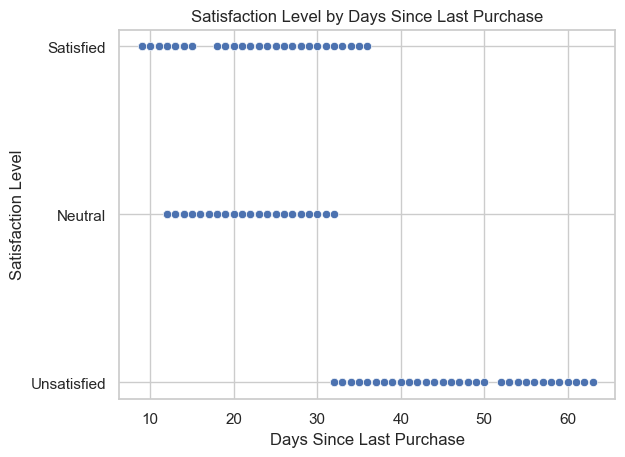

In [21]:
sns.scatterplot(x='Days Since Last Purchase', y='Satisfaction Level', data=df)
plt.title('Satisfaction Level by Days Since Last Purchase')
plt.show()

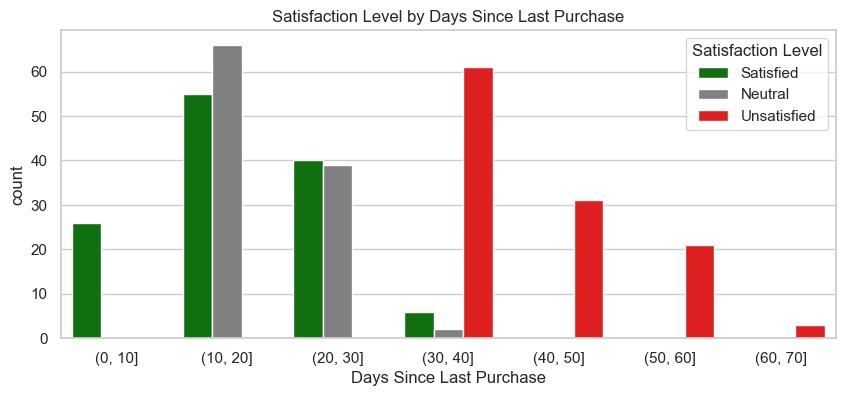

In [24]:
bins = np.arange(0, df['Days Since Last Purchase'].max() + 10, 10)

plt.figure(figsize=(10, 4))
sns.countplot(x=pd.cut(df['Days Since Last Purchase'], bins=bins, right=True),
              hue='Satisfaction Level',
              data=df,
              hue_order=['Satisfied', 'Neutral', 'Unsatisfied'],
              palette=('green', 'gray', 'red'))
plt.title('Satisfaction Level by Days Since Last Purchase')
plt.show()

### Encoding kategorickih kolona

In [25]:
num_cols = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase']

In [26]:
df_encoded = pd.get_dummies(df, columns=['City', 'Membership Type', 'Satisfaction Level'])
df_encoded['Gender'] = df_encoded['Gender'].map({'Female': 0, 'Male': 1})

In [27]:
df_encoded

,Gender,Age,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,City_Chicago,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco,Membership Type_Bronze,Membership Type_Gold,Membership Type_Silver,Satisfaction Level_Neutral,Satisfaction Level_Satisfied,Satisfaction Level_Unsatisfied
0,0,29,1120.20,14,4.6,True,25,False,False,False,False,True,False,False,True,False,False,True,False
1,1,34,780.50,11,4.1,False,18,False,False,True,False,False,False,False,False,True,True,False,False
2,0,43,510.75,9,3.4,True,42,True,False,False,False,False,False,True,False,False,False,False,True
3,1,30,1480.30,19,4.7,False,12,False,False,False,False,False,True,False,True,False,False,True,False
4,1,27,720.40,13,4.0,True,55,False,False,False,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,1,32,660.30,10,3.8,True,42,False,False,False,True,False,False,False,False,True,False,False,True
346,0,36,470.50,8,3.0,False,27,False,True,False,False,False,False,True,False,False,True,False,False
347,0,30,1190.80,16,4.5,True,28,False,False,False,False,True,False,False,True,False,False,True,False
348,1,34,780.20,11,4.2,False,21,False,False,True,False,False,False,False,False,True,True,False,False


### Standard scaler

In [28]:
scaler = StandardScaler()
df_scaled = df_encoded.copy()
df_scaled[num_cols] = scaler.fit_transform(df_encoded[num_cols])

In [29]:
df_scaled

,Gender,Age,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,City_Chicago,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco,Membership Type_Bronze,Membership Type_Gold,Membership Type_Silver,Satisfaction Level_Neutral,Satisfaction Level_Satisfied,Satisfaction Level_Unsatisfied
0,0,-0.945152,0.760130,0.337346,1.001981,True,-0.118359,False,False,False,False,True,False,False,True,False,False,True,False
1,1,0.082826,-0.179459,-0.385538,0.139479,False,-0.639907,False,False,True,False,False,False,False,False,True,True,False,False
2,0,1.933185,-0.925570,-0.867461,-1.068024,True,1.148256,True,False,False,False,False,False,True,False,False,False,False,True
3,1,-0.739557,1.756144,1.542153,1.174482,False,-1.086947,False,False,False,False,False,True,False,True,False,False,True,False
4,1,-1.356343,-0.345692,0.096385,-0.033022,True,2.116844,False,False,False,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,1,-0.328365,-0.511924,-0.626500,-0.378022,True,1.148256,False,False,False,True,False,False,False,False,True,False,False,True
346,0,0.494017,-1.036899,-1.108422,-1.758026,False,0.030654,False,True,False,False,False,False,True,False,False,True,False,False
347,0,-0.739557,0.955405,0.819269,0.829481,True,0.105161,False,False,False,False,True,False,False,True,False,False,True,False
348,1,0.082826,-0.180289,-0.385538,0.311979,False,-0.416386,False,False,True,False,False,False,False,False,True,True,False,False


In [30]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          350 non-null    int64  
 1   Age                             350 non-null    int64  
 2   Total Spend                     350 non-null    float64
 3   Items Purchased                 350 non-null    int64  
 4   Average Rating                  350 non-null    float64
 5   Discount Applied                350 non-null    bool   
 6   Days Since Last Purchase        350 non-null    int64  
 7   City_Chicago                    350 non-null    bool   
 8   City_Houston                    350 non-null    bool   
 9   City_Los Angeles                350 non-null    bool   
 10  City_Miami                      350 non-null    bool   
 11  City_New York                   350 non-null    bool   
 12  City_San Francisco              350 

## K-means clustering

### Trazenje optimalnog broja klastera

In [31]:
cluster_num = range(2, 11)
inertia = []
silhouette = []

for k in cluster_num:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(df_scaled, kmeans.labels_)
    silhouette.append(silhouette_avg)

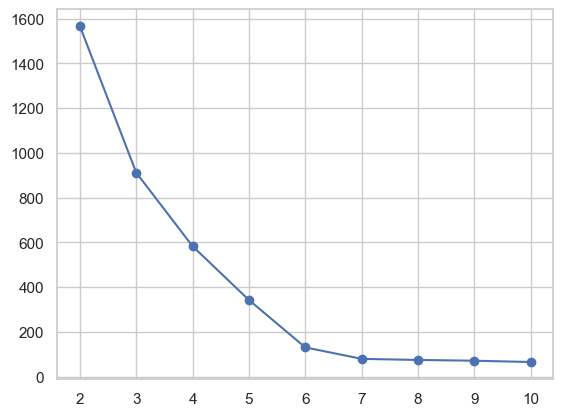

In [32]:
plt.plot(cluster_num, inertia, marker='o')

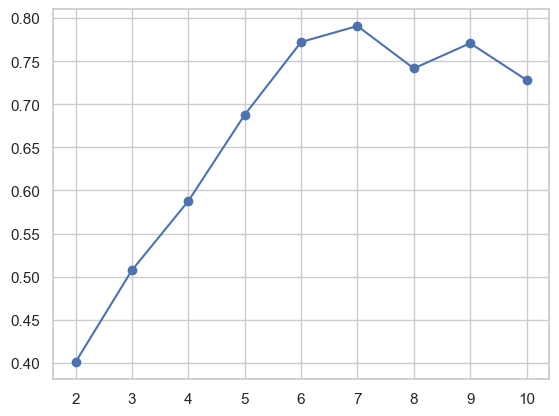

In [33]:
plt.plot(cluster_num, silhouette, marker='o')

In [38]:
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit_predict(df_scaled)
df_scaled['Kmeans labels'] = kmeans.labels_
df_scaled

,Gender,Age,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,City_Chicago,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco,Membership Type_Bronze,Membership Type_Gold,Membership Type_Silver,Satisfaction Level_Neutral,Satisfaction Level_Satisfied,Satisfaction Level_Unsatisfied,Kmeans labels
0,0,-0.945152,0.760130,0.337346,1.001981,True,-0.118359,False,False,False,False,True,False,False,True,False,False,True,False,4
1,1,0.082826,-0.179459,-0.385538,0.139479,False,-0.639907,False,False,True,False,False,False,False,False,True,True,False,False,2
2,0,1.933185,-0.925570,-0.867461,-1.068024,True,1.148256,True,False,False,False,False,False,True,False,False,False,False,True,3
3,1,-0.739557,1.756144,1.542153,1.174482,False,-1.086947,False,False,False,False,False,True,False,True,False,False,True,False,1
4,1,-1.356343,-0.345692,0.096385,-0.033022,True,2.116844,False,False,False,True,False,False,False,False,True,False,False,True,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,1,-0.328365,-0.511924,-0.626500,-0.378022,True,1.148256,False,False,False,True,False,False,False,False,True,False,False,True,6
346,0,0.494017,-1.036899,-1.108422,-1.758026,False,0.030654,False,True,False,False,False,False,True,False,False,True,False,False,0
347,0,-0.739557,0.955405,0.819269,0.829481,True,0.105161,False,False,False,False,True,False,False,True,False,False,True,False,4
348,1,0.082826,-0.180289,-0.385538,0.311979,False,-0.416386,False,False,True,False,False,False,False,False,True,True,False,False,2
